In [2]:
import queue

import numpy as np
from torchvision.datasets import MNIST

def download_mnist(is_train: bool):
    dataset = MNIST(root='./data',
                    transform=lambda x: np.array(x).flatten(),
                    download=True,
                    train=is_train)
    mnist_data = []
    mnist_labels = []
    for image, label in dataset:
        mnist_data.append(image)
        mnist_labels.append(label)
        
    return mnist_data, mnist_labels

In [ ]:
train_X, train_Y = download_mnist(is_train=True)
test_X, test_Y = download_mnist(is_train=False)

# Normalizarea inputului


In [5]:
def normalize_input(lst: list[int]):
    return [x / 255 for x in lst]

train_X = normalize_input(train_X)
test_X = normalize_input(test_X)

In [6]:
def label_encoding(labels: list[int]) -> list[list[int]]:
    return [[1 if label == i else 0 for i in range(10)] for label in labels]

train_Y = label_encoding(train_Y)
test_Y = label_encoding(test_Y)

### Salvare/Incarcare date
Pentru a nu descărca de atâtea ori, salvam si incarcam de pe disc datele deja prelucrate

In [7]:
np.savez('mnist_data.npz',
         train_X=train_X,
         train_Y=train_Y,
         test_X=test_X,
         test_Y=test_Y)

In [29]:
import numpy as np

data = np.load('mnist_data.npz')
train_X = data['train_X']
train_Y = data['train_Y']
test_X = data['test_X']
test_Y = data['test_Y']

### Grafic pentru acuratețe

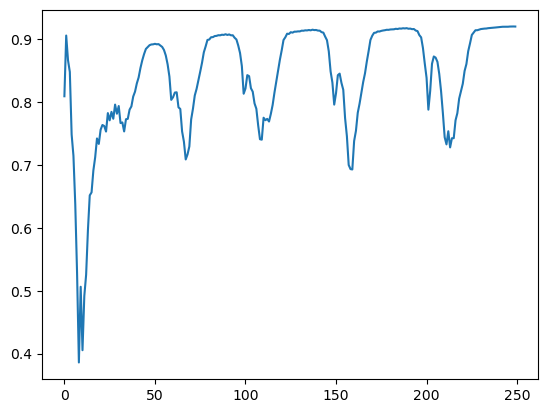

In [4]:
import numpy as np

data = np.load('models/model_9149.npz')
accuracies = data['accuracies']

import matplotlib.pyplot as plt

plt.plot(accuracies)